<a href="https://colab.research.google.com/github/rzorzal/redes_neurais_trabalho_2/blob/master/redes_neurais_trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 da Disciplina de Redes Neurais

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import label_binarize


In [6]:
def geraDatataSet(tam, centers=2):
  X, y = make_blobs(n_samples=tam, centers=centers, center_box=(0.0, 1.0), cluster_std=0.05)
  return X, y

In [597]:
def plotDataset(X, y):
  plt.xlabel('X1')
  plt.ylabel('X2')
  for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k], "o", alpha=3)

def plothiperplano(vetor, bias, xmin=0, xmax=1):
  xs = np.linspace(xmin, xmax, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
  plt.plot(xs,ys)

In [28]:
class CustoPerceptron():
  @staticmethod
  def erro(y, ypred):
    return y - ypred
  @staticmethod
  def custo(y, ypred):
    return np.sum(CustoPerceptron.erro(y, ypred)**2)
  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

In [273]:
class RicardoLoss():
  @staticmethod
  def erro(y, ypred):
    return np.tanh(y - ypred)
  @staticmethod
  def custo(y, ypred):
    return np.sum(np.absolute(RicardoLoss.erro(y, ypred))**3)
  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(X.T, RicardoLoss.erro(y, ypred))

In [458]:
class RicardoLoss2():
  @staticmethod
  def erro(y, ypred):
    return (y**y) - (y ** ypred) + (y**2 - ypred**2)
  @staticmethod
  def custo(y, ypred):
    return np.sum(np.absolute(RicardoLoss.erro(y, ypred)))
  @staticmethod
  def gradiente(y, ypred, X):
    custo = RicardoLoss.custo(y, ypred)
    return np.matmul(X.T, RicardoLoss.erro(y, ypred)) * np.sqrt(custo**3)

In [459]:
class NeuralNet(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron(), alpha=0.1, maxiter=200, threshold=0.5, activation=lambda a: (a>=0)*2-1):
    self.w = None
    self.labels = None
    self.custo = custo
    self.alpha = alpha
    self.maxiter = maxiter
    self.threshold = threshold
    self.activation = lambda a: (activation(a) > self.threshold)*2-1
  
  @staticmethod
  def includebias(X):
    bias = np.ones((X.shape[0],1))
    Xb = np.concatenate((bias,X), axis=1)
    return Xb
  
  def fit(self, X, y):
    Xb = NeuralNet.includebias(X)
    self.labels = list(set(y))
    if len(self.labels) > 2:
      y = label_binarize(y, classes=self.labels)*2-1
      self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
    else:
      self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.maxiter):
       a = self.preactivate(X)
       ypred = self.activation(a)
       custo = self.custo.custo(y, ypred)
       if custo == 0:
           break
       self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)


  def preactivate(self, X):
    Xb = NeuralNet.includebias(X)
    return np.matmul(Xb, self.w)

  def predict(self, X):
    a = self.preactivate(X)
    if len(self.w.shape) > 1:
        idx = np.argmax(a, axis=1)
        ypred = np.array([self.labels[i] for i in idx])
    else:
        ypred = self.activation(a)
    return ypred

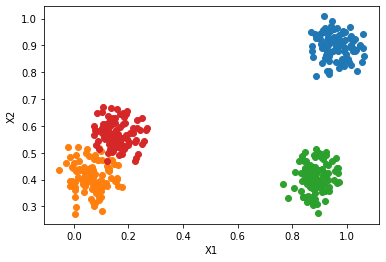

In [658]:
X, y = geraDatataSet(400, 4)
plotDataset(X, y)

In [659]:
perceptron = NeuralNet()
perceptron.fit(X, y)

perceptronRicardoLoss = NeuralNet(custo=RicardoLoss())
perceptronRicardoLoss.fit(X, y)

perceptronRicardoLoss2 = NeuralNet(custo=RicardoLoss2())
perceptronRicardoLoss2.fit(X, y)

0.314
[[ 15.62337366 -61.88164781  26.80432211 -78.32962901]
 [  7.39908139 -58.75980459 -39.06442227 108.10096167]] [-19.04338834  36.0969821    3.2630526  -54.72425911]


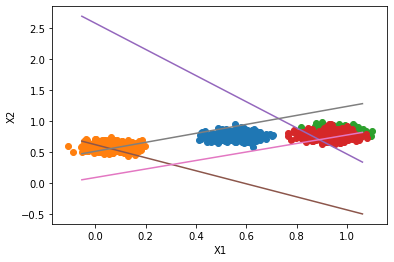

In [664]:
Xtest, ytest = geraDatataSet(2000, 4)


ypred = perceptron.predict(Xtest)
print(sum(ytest == ypred) / len(ytest))
print(perceptron.w[1:], perceptron.w[0])

plotDataset(Xtest, ytest)
for i in range(len(set(ytest))):
  plothiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))


0.002
[[ 16.19100029 -29.57841158  12.6120649  -36.67371404]
 [ 17.32271784 -28.24151581 -15.70304301  56.3881242 ]] [-27.13738923  17.71126682  -0.89404338 -19.43666081]


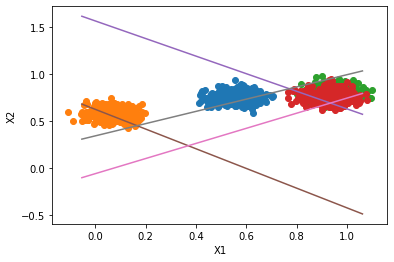

In [665]:
ypredRicardoLoss = perceptronRicardoLoss.predict(Xtest)
print(sum(ytest == ypredRicardoLoss) / len(ytest))
print(perceptronRicardoLoss.w[1:], perceptronRicardoLoss.w[0])

plotDataset(Xtest, ytest)
for i in range(len(set(ytest))):
  plothiperplano(perceptronRicardoLoss.w[1:,i], perceptronRicardoLoss.w[0,i], min(X[:,0]), max(X[:,0]))

0.002
[[ 278956.65315551 -552063.89277478  357890.09938428 -281703.47808192]
 [ 143946.74539497 -143616.56563733 -285825.41649837  174337.05107391]] [-337415.36719935  139724.27909373 -159017.38021879  -53612.96809125]


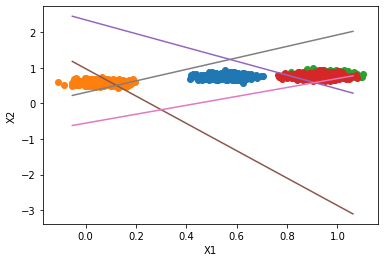

In [666]:
ypredRicardoLoss2 = perceptronRicardoLoss.predict(Xtest)
print(sum(ytest == ypredRicardoLoss2) / len(ytest))
print(perceptronRicardoLoss2.w[1:], perceptronRicardoLoss2.w[0])

plotDataset(Xtest, ytest)
for i in range(len(set(ytest))):
  plothiperplano(perceptronRicardoLoss2.w[1:,i], perceptronRicardoLoss2.w[0,i], min(X[:,0]), max(X[:,0]))

## Binário

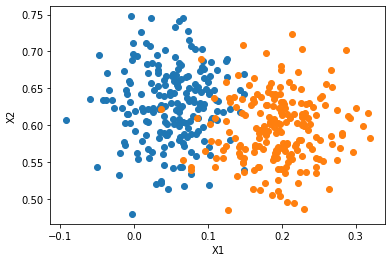

In [679]:
X2, y2 = geraDatataSet(400)
plotDataset(X2, y2)

In [680]:
perceptron2 = NeuralNet()
perceptron2.fit(X2, y2)

perceptron2RicardoLoss = NeuralNet(custo=RicardoLoss())
perceptron2RicardoLoss.fit(X2, y2)

perceptron2RicardoLoss2 = NeuralNet(custo=RicardoLoss2())
perceptron2RicardoLoss2.fit(X2, y2)

0.2685
[  2.67542083 114.44152594 -27.22018787]


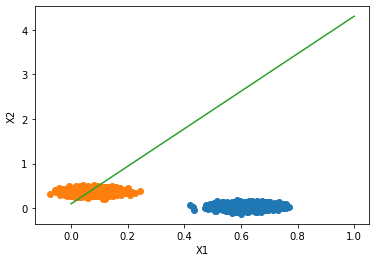

In [684]:
X2test, y2test = geraDatataSet(2000)


y2pred = perceptron2.predict(X2test)
print(sum(y2test == y2pred) / len(y2test))
print(perceptron2.w)

plotDataset(X2test, y2test)
plothiperplano(perceptron2.w[1:], perceptron2.w[0],0,1 )

0.5
[18.54147637 78.39929238 -8.32220033]


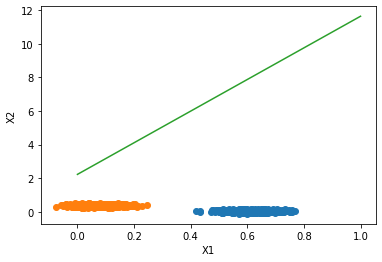

In [685]:
y2predRicardoLos = perceptron2RicardoLoss.predict(X2test)
print(sum(y2test == y2predRicardoLos) / len(y2test))
print(perceptron2RicardoLoss.w)

plotDataset(X2test, y2test)
plothiperplano(perceptron2RicardoLoss.w[1:], perceptron2RicardoLoss.w[0],0,1 )

0.173
[   128.31185578  76690.91212575 -19255.13017459]


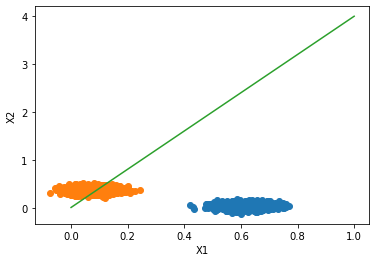

In [686]:
y2predRicardoLos2 = perceptron2RicardoLoss2.predict(X2test)
print(sum(y2test == y2predRicardoLos2) / len(y2test))
print(perceptron2RicardoLoss2.w)

plotDataset(X2test, y2test)
plothiperplano(perceptron2RicardoLoss2.w[1:], perceptron2RicardoLoss2.w[0],0,1 )